# Taxis dataset - EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Load dataset
# seaborn has a 'taxis' dataset; if you have a custom taxi CSV, replace this line.
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [3]:
# 2. Basic Information & Overview
print("Shape of Dataset : ", df.shape)
print("\nData Info :")
print(df.info())

Shape of Dataset :  (6433, 14)

Data Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
d

In [4]:
# 3. Summary Statistics
display(df.describe(include='all'))

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000,6433,6389,6407,6388,6407,6388
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,194,203,4,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5451,4577,230,245,5268,5206
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794,NaN,NaN,NaN,NaN,NaN,NaN
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000,NaN,NaN,NaN,NaN,NaN,NaN
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 4. Missing values Analysis
missing = pd.DataFrame({
    'missing_count' : df.isnull().sum(),
    'missing_percent' : (df.isnull().sum()/len(df))*100
}).sort_values(by='missing_percent', ascending=False)
print(missing)

                 missing_count  missing_percent
dropoff_zone                45         0.699518
dropoff_borough             45         0.699518
payment                     44         0.683973
pickup_zone                 26         0.404166
pickup_borough              26         0.404166
pickup                       0         0.000000
tip                          0         0.000000
fare                         0         0.000000
distance                     0         0.000000
passengers                   0         0.000000
dropoff                      0         0.000000
color                        0         0.000000
tolls                        0         0.000000
total                        0         0.000000


In [6]:
# 4a. Handling missing values
# Example numeric columns: 'fare','tip','distance' - fill with median if missing
for c in df.select_dtypes(include=['float64','int64']).columns:
    if df[c].isnull().sum() > 0:
        df[c] = df[c].fillna(df[c].median())

In [7]:
# For categorical columns fill with mode
for c in df.select_dtypes(include=['object','category']).columns:
    if df[c].isnull().sum() > 0:
        df[c] = df[c].fillna(df[c].mode()[0])

print('Missing values after cleaning :', df.isnull().sum().sum())

Missing values after cleaning : 0


In [8]:

# Duplication & Data type check
print("Duplicate Rows : ", df.duplicated().sum())

Duplicate Rows :  0


In [9]:
# convert some types to category if applicable
for c in ['payment','color','pickup_zone','dropoff_zone']:
    if c in df.columns:
        df[c] = df[c].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   category      
 9   payment          6433 non-null   category      
 10  pickup_zone      6433 non-null   category      
 11  dropoff_zone     6433 non-null   category      
 12  pickup_borough   6433 non-null   object        
 13  dropoff_borough  6433 non-null   object        
dtypes: category(4), datetime64[ns](2), float

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


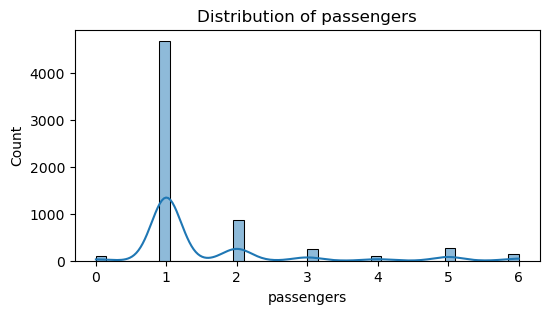

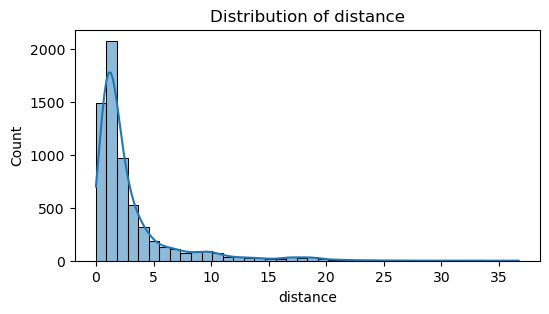

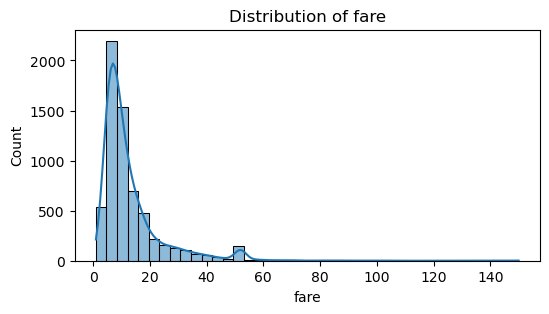

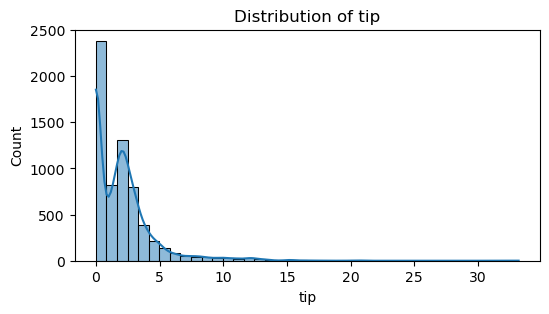

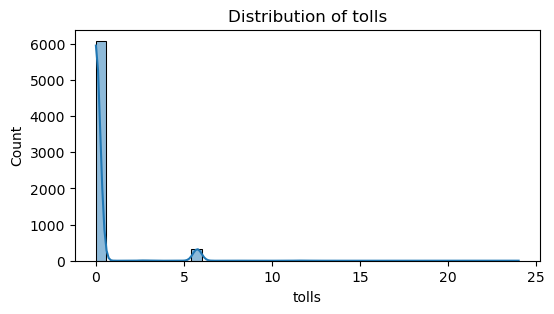

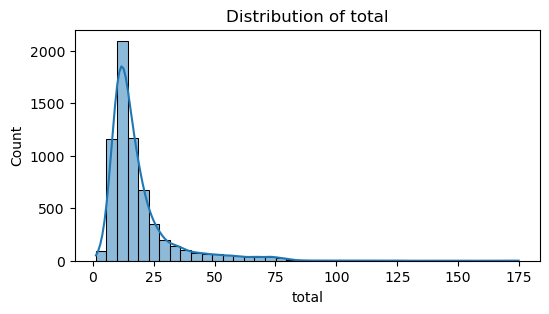

In [10]:
# Univariate Analysis - Numerical Features
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
display(df[num_cols].describe())

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

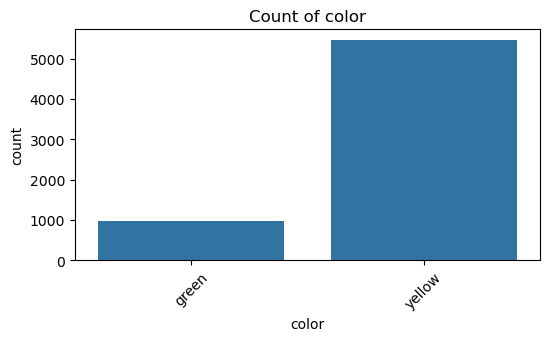

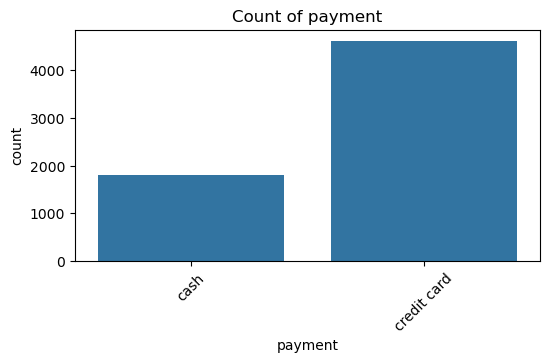

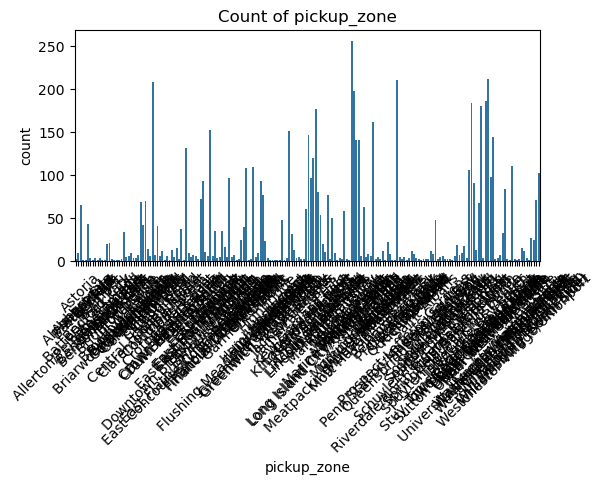

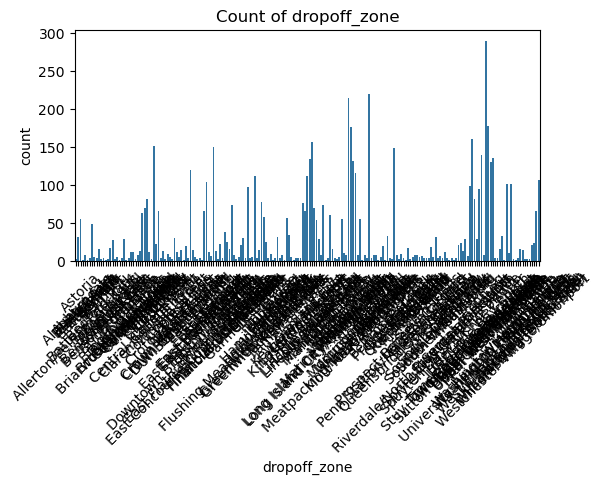

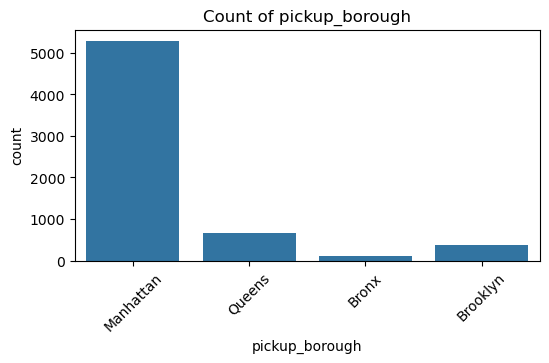

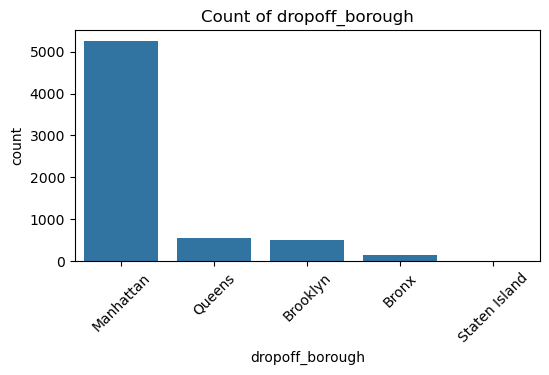

In [11]:
# Univariate Analysis - Categorical Features
cat_cols = df.select_dtypes(include=['category','object']).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

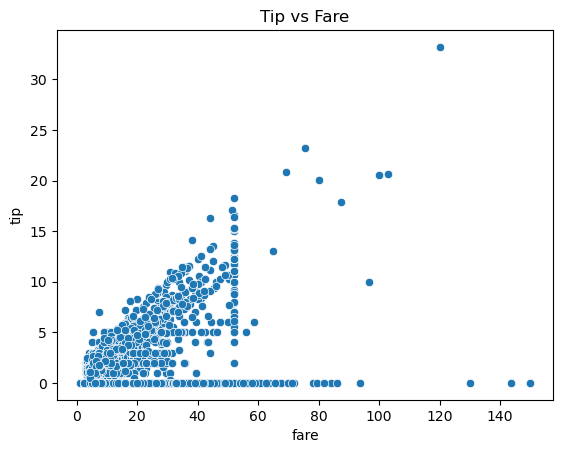

In [12]:
# Bivariate Analysis - Examples
# fare vs tip
if set(['fare','tip']).issubset(df.columns):
    sns.scatterplot(x='fare', y='tip', data=df)
    plt.title("Tip vs Fare")
    plt.show()

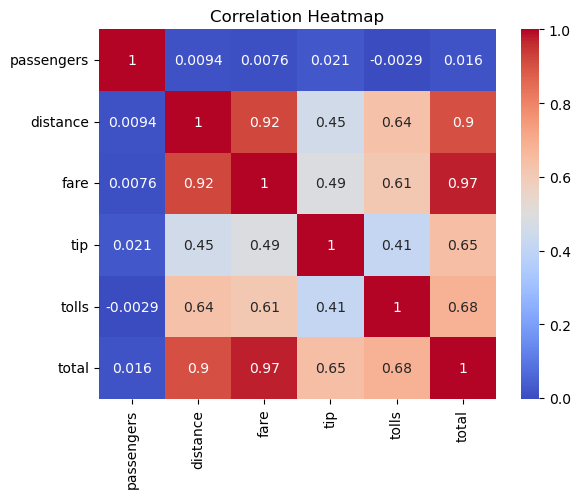

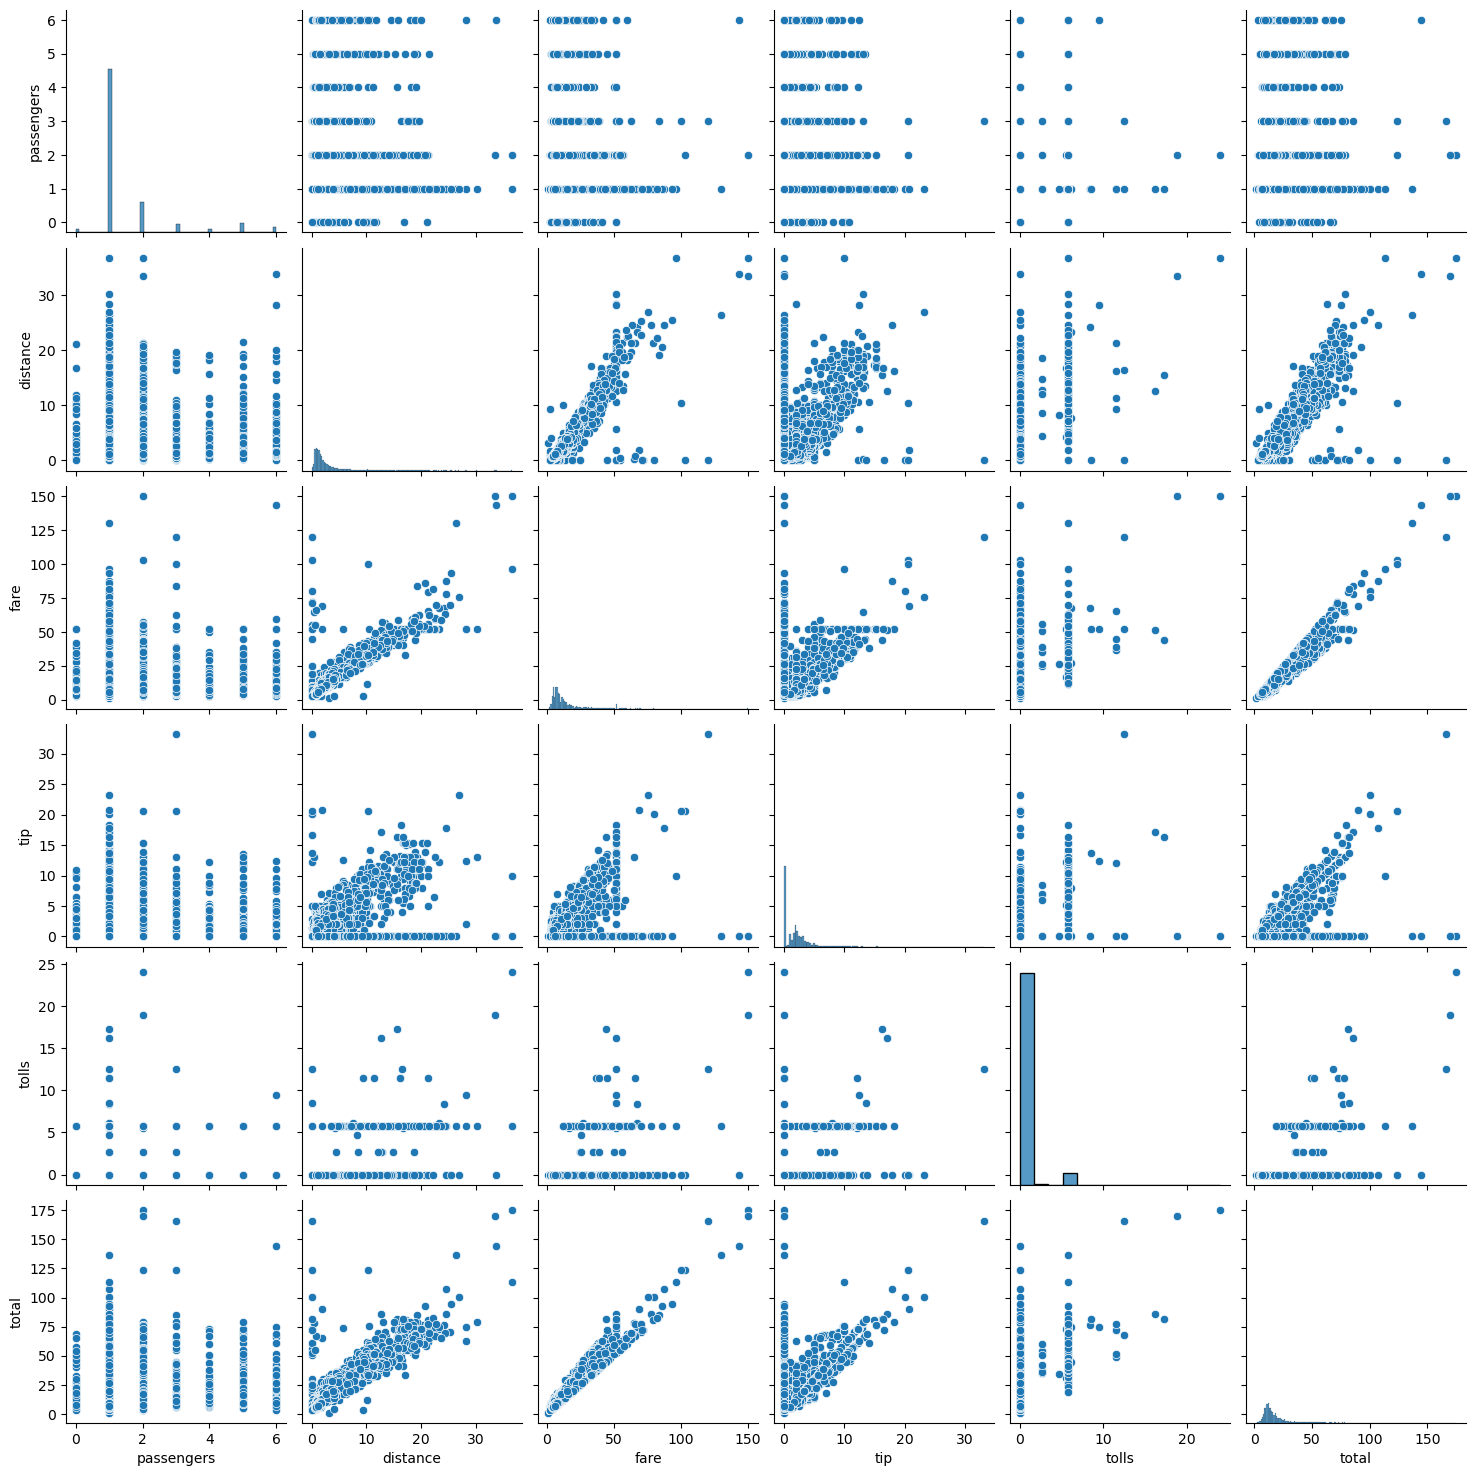

In [13]:
# Correlation and multivariate analysis
corr_cols = [c for c in num_cols if c in df.columns]
if len(corr_cols) >= 2:
    corr = df[corr_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
    sns.pairplot(df[corr_cols])
    plt.show()

Number of outliers in fare :  592


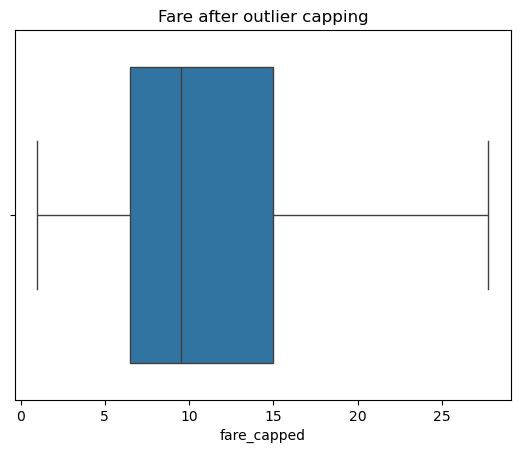

In [14]:
# Outlier detection using IQR on 'fare' (example)
if 'fare' in df.columns:
    Q1 = df['fare'].quantile(0.25)
    Q3 = df['fare'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df['fare'] < lower) | (df['fare'] > upper)]
    print("Number of outliers in fare : ",len(outliers))
    df['fare_capped'] = df['fare'].clip(lower, upper)
    sns.boxplot(x=df['fare_capped'])
    plt.title("Fare after outlier capping")
    plt.show()

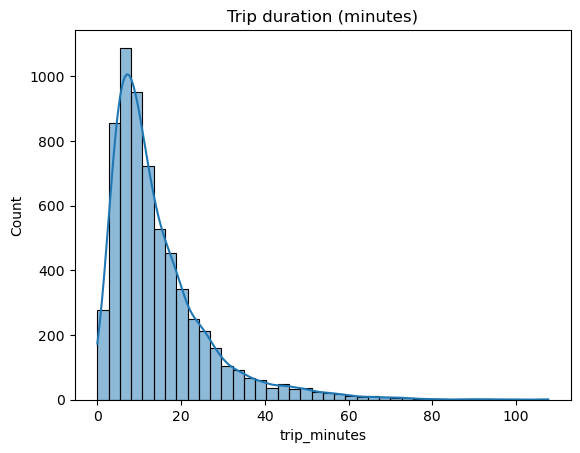

In [15]:
# Feature Engineering
# Example: compute trip duration in minutes if pickup and dropoff datetime exist
if set(['pickup','dropoff']).issubset(df.columns):
    df['pickup'] = pd.to_datetime(df['pickup'], errors='coerce')
    df['dropoff'] = pd.to_datetime(df['dropoff'], errors='coerce')
    df['trip_minutes'] = (df['dropoff'] - df['pickup']).dt.total_seconds() / 60
    df['trip_minutes'] = df['trip_minutes'].fillna(df['trip_minutes'].median())
    sns.histplot(df['trip_minutes'], bins=40, kde=True)
    plt.title("Trip duration (minutes)")
    plt.show()

In [16]:
# Export the Cleaned data
df.to_csv("taxis_cleaned.csv", index=False)
print("\n Cleaned taxis data saved as taxis_cleaned.csv")


 Cleaned taxis data saved as taxis_cleaned.csv
